In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Download and extract the datasets

* The datasets are located on Kaggle @ [www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats/data).
* Download and extract the dataset to `./data/` folder.

In [2]:
def create_small_dataset(target_dir='./data/dogs-vs-cats_small'):
    """Creates a smalled Cat/Dog dataset from the original Kaggle one."""
    import os, shutil
    original_dataset_dir = './data/dogs-vs-cats/train'
    
    def join_and_create(base, append):
        """Joins the `base` and `append` strings to create a folder path, and creates it."""
        directory = os.path.join(base, append)
        try:
            os.mkdir(directory)
        except OSError as e:
            print("[E] Cannot create {}, skipping...".format(directory))
        return directory
    def copy_files(f_pattern, f_range, destination):
        """Copies files from the original dataset directory. f_pattern must have 1 (one) parameter for `format`"""
        # f_names = [f_pattern.format(i) for i in range(f_range[0], f_range[1])]
        for fname in (f_pattern.format(i) for i in range(f_range[0], f_range[1])):
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(destination, fname)
            shutil.copyfile(src, dst)
    
    base_dir = join_and_create(target_dir, '')
    
    train_dir = join_and_create(base_dir, 'train')
    validation_dir = join_and_create(base_dir, 'validation')
    test_dir = join_and_create(base_dir, 'test')
    
    train_cats_dir = join_and_create(train_dir, 'cats')
    train_dogs_dir = join_and_create(train_dir, 'dogs')
    validation_cats_dir = join_and_create(validation_dir, 'cats')
    validation_dogs_dir = join_and_create(validation_dir, 'dogs')
    test_cats_dir = join_and_create(test_dir, 'cats')
    test_dogs_dir = join_and_create(test_dir, 'dogs')
    
    copy_files('cat.{}.jpg', (0, 1000), train_cats_dir)
    copy_files('cat.{}.jpg', (1000, 1500), validation_cats_dir)
    copy_files('cat.{}.jpg', (1500, 2000), test_cats_dir)
    copy_files('dog.{}.jpg', (0, 1000), train_dogs_dir)
    copy_files('dog.{}.jpg', (1000, 1500), validation_dogs_dir)
    copy_files('dog.{}.jpg', (1500, 2000), test_dogs_dir)
    
    return base_dir, train_dir, validation_dir, test_dir
    
base_dir, train_dir, validation_dir, test_dir = create_small_dataset()

[E] Cannot create ./data/dogs-vs-cats_small/, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/train, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/validation, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/test, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/train/cats, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/train/dogs, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/validation/cats, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/validation/dogs, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/test/cats, skipping...
[E] Cannot create ./data/dogs-vs-cats_small/test/dogs, skipping...


## Create a model

- Create a model
- Train the model to have a baseline for the performance
- Visualize the accuracy and loss

In [10]:
def make_model():
    from keras import layers
    from keras import models
    from keras import optimizers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    return model

model = make_model()

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)
model.save('models/cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5887 - acc: 0.6990 - val_loss: 0.6164 - val_acc: 0.6500
Epoch 2/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5404 - acc: 0.7250 - val_loss: 0.5955 - val_acc: 0.6740
Epoch 3/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5090 - acc: 0.7495 - val_loss: 0.5624 - val_acc: 0.7130
Epoch 4/30
100/100 [==============================] - 5s 49ms/step - loss: 0.4744 - acc: 0.7815 - val_loss: 0.5711 - val_acc: 0.7060
Epoch 5/30
100/100 [==============================] - 5s 49ms/step - loss: 0.4526 - acc: 0.7885 - val_loss: 0.5656 - val_acc: 0.7090
Epoch 6/30
100/100 [==============================] - 5s 49ms/step - loss: 0.4163 - acc: 0.8080 - val_loss: 0.5725 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 5s 49ms/step - loss: 0.3882 - acc: 0.8310 - val_loss: 0.5993 - val_acc: 0.7150
Epoch 8/30
100/100 [==============================] - 5s 49ms/step - 

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


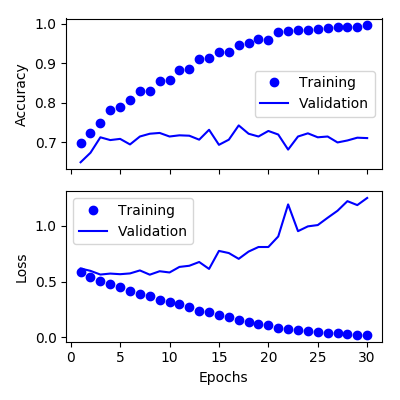

In [24]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(4, 4))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.tight_layout()

## Data augmentation

- Augment the data
- Visualize the augmented data

In [26]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

<IPython.core.display.Javascript object>


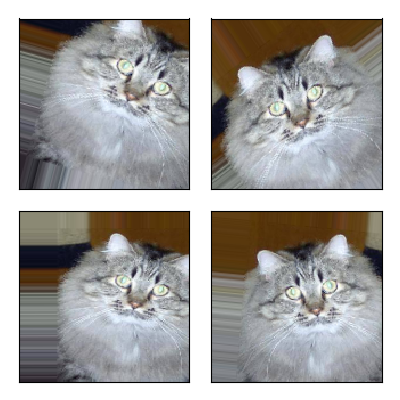

In [34]:
from keras.preprocessing import image
import os

fnames = [os.path.join(train_dir, 'cats', fname) for fname in os.listdir(os.path.join(train_dir, 'cats'))]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(4, 4))
for idx, batch in enumerate(datagen.flow(x, batch_size=1)):
    ax[idx / 2][idx % 2].imshow(image.array_to_img(batch[0]))
    ax[idx / 2][idx % 2].set_xticks([])
    ax[idx / 2][idx % 2].set_yticks([])
    i += 1
    if i % 4 == 0:
        break
plt.tight_layout()

## Retrain the model using data augmentation

In [35]:
def make_model_do():
    from keras import layers
    from keras import models
    from keras import optimizers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])
    return model

model = make_model_do()

In [37]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    # fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)
model.save('models/cats_and_dogs_small_2.h5')

Epoch 1/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6950 - acc: 0.5178 - val_loss: 0.6838 - val_acc: 0.5831
Epoch 2/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6809 - acc: 0.5628 - val_loss: 0.6639 - val_acc: 0.5844
Epoch 3/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6736 - acc: 0.5706 - val_loss: 0.6524 - val_acc: 0.6142
Epoch 4/100
100/100 [==============================] - 17s 165ms/step - loss: 0.6587 - acc: 0.5990 - val_loss: 0.7182 - val_acc: 0.5336
Epoch 5/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6539 - acc: 0.6050 - val_loss: 0.6311 - val_acc: 0.6345
Epoch 6/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6326 - acc: 0.6478 - val_loss: 0.6090 - val_acc: 0.6580
Epoch 7/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6206 - acc: 0.6497 - val_loss: 0.5850 - val_acc: 0.6815
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 16s 162ms/step - loss: 0.4340 - acc: 0.7906 - val_loss: 0.4197 - val_acc: 0.8122
Epoch 62/100
100/100 [==============================] - 17s 168ms/step - loss: 0.4160 - acc: 0.8066 - val_loss: 0.4679 - val_acc: 0.7970
Epoch 63/100
100/100 [==============================] - 16s 164ms/step - loss: 0.4218 - acc: 0.8097 - val_loss: 0.4464 - val_acc: 0.7887
Epoch 64/100
100/100 [==============================] - 16s 164ms/step - loss: 0.4091 - acc: 0.8050 - val_loss: 0.4641 - val_acc: 0.7970
Epoch 65/100
100/100 [==============================] - 16s 163ms/step - loss: 0.4040 - acc: 0.8141 - val_loss: 0.4765 - val_acc: 0.7868
Epoch 66/100
100/100 [==============================] - 16s 163ms/step - loss: 0.3951 - acc: 0.8197 - val_loss: 0.4908 - val_acc: 0.7697
Epoch 67/100
100/100 [==============================] - 17s 169ms/step - loss: 0.4042 - acc: 0.8166 - val_loss: 0.5459 - val_acc: 0.7513
Epoch 68/100
100/100 [===================

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


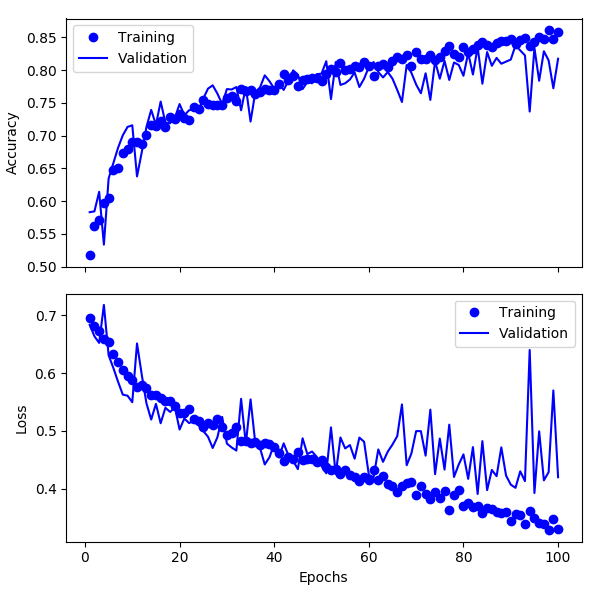

In [42]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(6, 6))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')

plt.tight_layout()

## Use pretrained model

In [43]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))
conv_base.summary()

58900480/58889256 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool

### Fast features using the pretrained conv base

In [47]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [49]:
def model_head():
    from keras import models
    from keras import layers
    from keras import optimizers
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_dim = 4*4*512))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])
    return model

model = model_head()
history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 262us/step - loss: 0.5781 - acc: 0.6905 - val_loss: 0.4380 - val_acc: 0.8270
Epoch 2/30
2000/2000 [==============================] - 0s 203us/step - loss: 0.4251 - acc: 0.8185 - val_loss: 0.3653 - val_acc: 0.8500
Epoch 3/30
2000/2000 [==============================] - 0s 206us/step - loss: 0.3508 - acc: 0.8580 - val_loss: 0.3277 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 0s 199us/step - loss: 0.3107 - acc: 0.8800 - val_loss: 0.3091 - val_acc: 0.8690
Epoch 5/30
2000/2000 [==============================] - 0s 198us/step - loss: 0.2879 - acc: 0.8820 - val_loss: 0.2874 - val_acc: 0.8860
Epoch 6/30
2000/2000 [==============================] - 0s 204us/step - loss: 0.2617 - acc: 0.8965 - val_loss: 0.2751 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 0s 200us/step - loss: 0.2483 - acc: 0.9065 - val_loss: 0.2717 - val_acc: 0.8870


In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


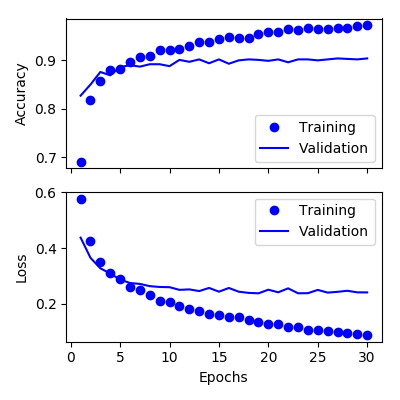

In [52]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(4, 4))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')

plt.tight_layout()

## Feature extraction with data augmentation

- We can freeze some of the layers

In [58]:
def model_freeze():
    from keras import models
    from keras import layers
    from keras import optimizers
    
    conv_base.trainable = False
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=2e-5),
                  metrics=['acc'])
    return model
model = model_freeze()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [56]:
print (dir(conv_base))

['__call__', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_inbound_node', '_built', '_check_num_samples', '_check_trainable_weights_consistency', '_container_nodes', '_feed_input_names', '_feed_input_shapes', '_feed_inputs', '_fit_loop', '_get_node_attribute_at_index', '_inbound_nodes', '_internal_input_shapes', '_internal_output_shapes', '_make_predict_function', '_make_test_function', '_make_train_function', '_node_key', '_nodes_by_depth', '_outbound_nodes', '_output_mask_cache', '_output_shape_cache', '_output_tensor_cache', '_per_input_losses', '_per_input_updates', '_predict_loop', '_standardize_user_data', '_test_loop', '_updated_config', 'add_loss', 'add_update', 'add_weight', 'assert_input_compatibility', 'build', 'built', 'call', 'compile', 'compute_mask', 'compute_out